# Introduction

## The concept of *archetype*
	
An *archetype* is an original pattern or model from which copies are made; a prototype.

## Example: *Inside Out*

![Archetypal emotions in *Inside Out* movie ](static/introduction/inside_out_all.png){width=30%}

---

![New emotions obtained from combining the archetypal emotions](static/introduction/inside_out.png){.r-stretch}

---

## Motivation of work

![Number of publications containing the "archetypal analysis" keyword over the years. Data has been collected from Google Scholar.](static/introduction/trend.png)


# Preliminaries

## Machine Learning

![Machine learning overview](static/introduction/ml-mindmap.png){.r-stretch}

## Archetypal Analysis (AA)

- Unsupervised machine learning technique introduced by Cutler and Breiman in 1994.
- Identifies extreme points that are representative of the underlying patterns or structures within the data set.
- Represents each data point as a mixture of these archetypes.

In [1]:
import numpy as np
from archetypes import AA

generator = np.random.RandomState(20)

data = generator.normal(size=(40, 2))

generator = np.random.RandomState(20)
aa = AA(n_archetypes=3, max_iter=400, tol=0,
        method='nnls',
        method_kwargs={'max_iter_optimizer': 10_000, 'const': 10},
        init='uniform',
        random_state=generator)

aa.fit(data)

trans_data = aa.transform(data) @ aa.archetypes_

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mlp

# plot convex hulls
from scipy.spatial import ConvexHull

hull = ConvexHull(aa.archetypes_)

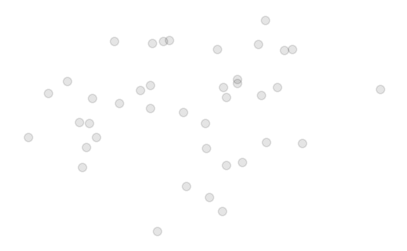

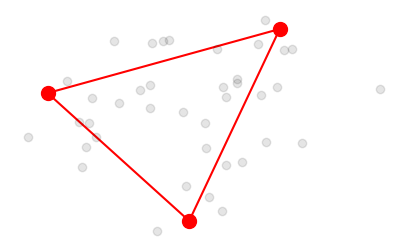

In [3]:
#| layout-ncol: 2
#| fig-cap: 
#|   - "Dataset"
#|   - "Archetypes"

fig = plt.figure(figsize=(5, 3))
plt.scatter(data[:, 0], data[:, 1], zorder=10, marker='o', c='k', alpha=0.1)
plt.axis("off")
plt.show()

fig = plt.figure(figsize=(5, 3))
plt.scatter(data[:, 0], data[:, 1], zorder=10, marker='o', c='k', alpha=0.1)
plt.scatter(aa.archetypes_[:, 0], aa.archetypes_[:, 1], c='r', s=100, zorder=20)

for simplex in hull.simplices:
    plt.plot(aa.archetypes_[simplex, 0], aa.archetypes_[simplex, 1], 'r-')

plt.axis("off")
plt.show()


---

### Formal Definition

Let $\mathfrak{X}=\{\bm{x}^{(1)}, \bm{x}^{(2)}, \ldots, \bm{x}^{(N)}\}$ be a dataset where each $\bm{x}^{(n)} \in \mathbb{R}^M$.

**Objective**

Find some archetypes $\mathfrak{Z} = \{\bm{z}^{(1)}, \bm{z}^{(2)}, \ldots, \bm{z}^{(K)}\}$ where each $\bm{z}^{(k)} \in \mathbb{R}^M$, which are convex combinations of the data points in $\mathfrak{X}$.

---

Therefore, each archetype $\bm{Z}_k$, i.e. $\bm{z}^{(k)}$, can be represented as

$$ \bm{Z}_k = \sum_{n=1}^{N} \bm{{B}}_{k,n} \bm{X}_n $$

subject to $\|{\bm{{B}}_k}\|_1 = 1$ and $\bm{{B}}_{k,n} \in [0, 1]$.

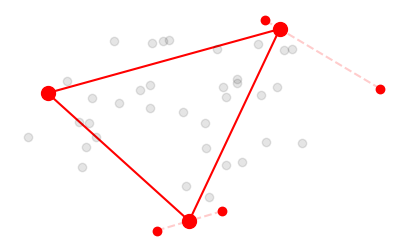

In [4]:
#| fig-cap: "Archetypes as convex combinations of the data"

fig = plt.figure(figsize=(5, 3))

plt.scatter(data[:, 0], data[:, 1], zorder=10, marker='o', c='k', alpha=0.1)

# plot points that generate the archetypes
index = np.where(aa.archetypes_similarity_degree_ > 0.1)

for i in index[1]:
    plt.scatter(data[i, 0], data[i, 1], c='r', zorder=50, alpha=1)

# plot a dashed line from data to archetypes
for i, j in zip(index[0], index[1]):
    plt.plot([data[j, 0], aa.archetypes_[i, 0]], [data[j, 1], aa.archetypes_[i, 1]], 'r--', zorder=5, alpha=0.2)

plt.scatter(aa.archetypes_[:, 0], aa.archetypes_[:, 1], c='r', s=100, zorder=20)
for simplex in hull.simplices:
    plt.plot(aa.archetypes_[simplex, 0], aa.archetypes_[simplex, 1], 'r-')

# hide axes
plt.axis("off")

plt.show()


---

Simultaneously, each data point $\bm{X}_n$, i.e. $\bm{x}^{(n)}$, is then approximated as a convex combination of these archetypes
$$ \bm{X}_n \approx \sum_{k=1}^{K} \bm{{A}}_{n,k} \bm{Z}_k $$
similarly subject to $\|{\bm{{A}}_n}\|_1 = 1$ and $\bm{{A}}_{n,k} \in [0,1]$.

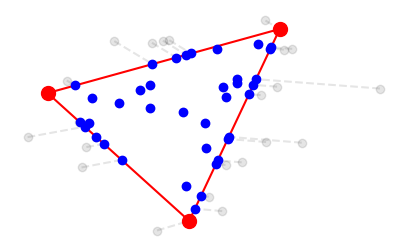

In [5]:
#| fig-cap: Data aproximated as convex combinations of the archetypes

fig = plt.figure(figsize=(5, 3))

plt.scatter(data[:, 0], data[:, 1], zorder=10, marker='o', c='k', alpha=0.1)

plt.scatter(trans_data[:, 0], trans_data[:, 1], c='b', zorder=10, alpha=1)

# plot a dashed line from data to transformed data
for i in range(data.shape[0]):
    plt.plot([data[i, 0], trans_data[i, 0]], [data[i, 1], trans_data[i, 1]], 'k--', zorder=5, alpha=0.1)

plt.scatter(aa.archetypes_[:, 0], aa.archetypes_[:, 1], c='r', s=100, zorder=20)
for simplex in hull.simplices:
    plt.plot(aa.archetypes_[simplex, 0], aa.archetypes_[simplex, 1], 'r-')

plt.axis("off")
plt.show()

---

This formulation thus involves two matrices of coefficients: $\bm{{B}}$ which define the archetypes as combinations of the data points, and $\bm{{A}}$ which represent each data point as a mixture of archetypes.

In matrix notation, archetypal analysis can be expressed as:
$$ \bm{X} \approx \bm{A} \bm{Z} = \bm{A} (\bm{B} \bm{X})$$

---

### Computation

$$ \argmin_{\bm{A}, \bm{B}} \|{\bm{X} - \bm{A}\bm{B}\bm{X}}\|^2_F $$
where  $\|{\bm{{A}}_n}\|_1 = 1$, $\bm{{A}}_{n,k} \in [0, 1]$, $\|{\bm{B}_k}\|_1 = 1$ and $\bm{{B}}_{k,n} \in [0, 1]$.

**Steps**

1. Initialize archetypes
2. Loop until error reduction is sufficiently small:
    1. Aprixmate $\bm{X}$ as convex combinations of $\bm{Z}$, i.e. optimize $\bm{A}$.
    2. Update archetypes, i.e. $\bm{Z} = \bm{A}^{-1} \bm{X}$.
    3. Represent $\bm{Z}$ as convex combinations of $\bm{X}$, i.e. optimize $\bm{B}$.
    4. Update archetypes, i.e. $\bm{Z} = \bm{B}\bm{X}$.
    5. Compute error $\|{\bm{X} - \bm{A}\bm{B}\bm{X}}\|^2_F$.

---

#### Example

::: {.animation-center}

In [6]:
archetypes_comp = []
trans_data_comp = []
hull_comp = []
loss_comp = []

for i in range(1, 100):
    generator = np.random.RandomState(20)
    aa = AA(n_archetypes=3, max_iter=i, tol=0,
            method='nnls',
            # method_kwargs={'max_iter_optimizer': 10_000, 'const': 10},
            init='uniform',
            save_init=True,
            random_state=generator)

    _ = aa.fit(data)

    archetypes_comp.append(aa.archetypes_)
    trans_data_comp.append(aa.transform(data) @ aa.archetypes_)
    hull_comp.append(ConvexHull(aa.archetypes_))
    loss_comp.append(aa.loss_[-1])
    

In [7]:
# #| fig-cap: Example of the archetypes computation

import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(7, 4))

plt.scatter(data[:, 0], data[:, 1], zorder=10, marker='o', c='k', alpha=0.1)

scat_trans = plt.scatter(trans_data_comp[0][:, 0], trans_data_comp[0][:, 1], c='b', zorder=10, alpha=1)
line_trans = []
for i in range(data.shape[0]):
    l_t = plt.plot([data[i, 0], trans_data_comp[0][i, 0]], [data[i, 1], trans_data_comp[0][i, 1]], 'k--', zorder=5, alpha=0.1)
    line_trans.append(l_t[0])

scat_arch = plt.scatter(archetypes_comp[0][:, 0], archetypes_comp[0][:, 1], c='r', s=100, zorder=20)
line_arch = []

for simplex in hull_comp[0].simplices:
    l_a = plt.plot(archetypes_comp[0][simplex, 0], archetypes_comp[0][simplex, 1], 'r-')
    line_arch.append(l_a[0])

ann_step = plt.annotate(f"Step: {0}\nLoss: {loss_comp[0]:.2f}", [0.1, 0.9], xycoords='subfigure fraction')

def update(frame):
    scat_trans.set_offsets(trans_data_comp[frame])
    for i in range(data.shape[0]):
        line_trans[i].set_xdata([data[i, 0], trans_data_comp[frame][i, 0]])
        line_trans[i].set_ydata([data[i, 1], trans_data_comp[frame][i, 1]])

    scat_arch.set_offsets(archetypes_comp[frame])
    for i, simplex in enumerate(hull_comp[frame].simplices):
        line_arch[i].set_xdata(archetypes_comp[frame][simplex, 0])
        line_arch[i].set_ydata(archetypes_comp[frame][simplex, 1])

    ann_step.set_text(f"Step {frame}\nLoss: {loss_comp[frame]:.2f}")
    
    return (scat_trans, line_trans, scat_arch, line_arch, ann_step)


ani = animation.FuncAnimation(fig=fig, func=update, frames=60)

plt.axis("off")
plt.tight_layout()
plt.close()
plt.rcParams["animation.html"] = "jshtml"
ani

:::

---

### Selecting the optimal number of archetypes

- Achieving a balance between complexity and elucidation of data patterns is crucial.
- Archetypes are not necessarily nested; they can change as $K$ increases to better capture data structure.
- The Elbow Method is a preferred approach due to its simplicity and intuitive visual clarity.


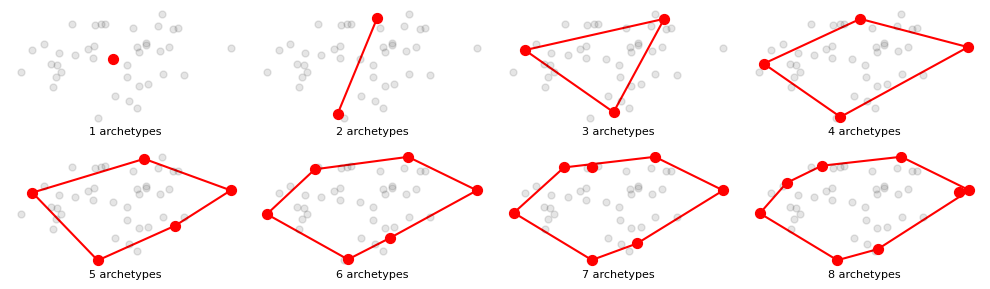

In [8]:
#| fig-cap: Archetyal analysis using different number of archetypes

fig, ax = plt.subplots(2, 4, figsize=(10, 3))
axs = ax.flatten()
elbow_models = []
for k in range(1, 9):
    generator = np.random.RandomState(23)
    aa = AA(n_archetypes=k, max_iter=200, tol=0,
            method='pgd',
            method_kwargs={'max_iter_optimizer': 10, 'beta': 0.88},
            init='uniform',
            save_init=False,
            random_state=generator)

    _ = aa.fit(data)

    elbow_models.append(aa)
    
    axs[k-1].scatter(data[:, 0], data[:, 1], zorder=10, s=25, marker='o', c='k', alpha=0.1)
    axs[k-1].scatter(aa.archetypes_[:, 0], aa.archetypes_[:, 1], c='r', s=50, zorder=20)

    if k == 2:
            axs[k-1].plot([aa.archetypes_[0, 0], aa.archetypes_[1, 0]], [aa.archetypes_[0, 1], aa.archetypes_[1, 1]], 'r-')
    if k > 2:
        hull_k = ConvexHull(aa.archetypes_)
        
        for simplex in hull_k.simplices:
            axs[k-1].plot(aa.archetypes_[simplex, 0], aa.archetypes_[simplex, 1], 'r-')
    axs[k-1].annotate(f"{k} archetypes", [0.5, -0.1], xycoords="axes fraction", horizontalalignment="center", fontsize="8")
    axs[k-1].axis("off")
fig.set_tight_layout(True)

---

#### The Elbow Method

1. Plot performance metric (variance explained or reconstruction error) vs. number of archetypes.
2. Identify the "elbow" where marginal gains diminish.
3. The elbow indicates the optimal number of archetypes.

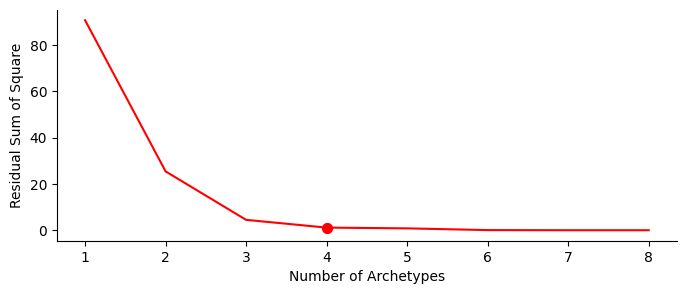

In [9]:
#| fig-cap: Elbow method for previous example

rss = [model.loss_[-1] for model in elbow_models]
arch = [model.n_archetypes for model in elbow_models]

fig, ax = plt.subplots(1, 1, figsize=(8, 3))

plt.plot(arch, rss, c="r")

plt.scatter([arch[3]], [rss[3]], s=50, c="r", zorder=10)

ax.spines[['right', 'top']].set_visible(False)

ax.set_ylabel("Residual Sum of Square")
ax.set_xlabel("Number of Archetypes")
plt.show()

---

#### Alternative Methods

- Cross-Validation: Split data into training and testing sets. Evaluate model performance on unseen data.
- Information Criteria: Use AIC or BIC. Balance goodness of fit and model complexity.
- Domain Knowledge: Leverage domain-specific insights. Guide selection based on expected patterns.
- Stability Analysis: Check consistency across data subsets or through bootstrapping. Ensure a reliable model choice.

## Archetypoid Analysis (ADA)

- Introduced by Vinué, Epifanio and Alemany in 2015.
- Identifies real data points (archetypoids) as representatives, not convex combinations.
- Easier to understand results since archetypoids are actual data points.
- Ideal for scenarios where interpretability and real-world relevance are crucial. E.g. Countries.


---

### Formal Definition

Let $\mathfrak{X}=\{\bm{x}^{(1)}, \bm{x}^{(2)}, \ldots, \bm{x}^{(N)}\}$ be a dataset where each $\bm{x}^{(n)} \in \mathbb{R}^M$.

**Objective**

Find some archetypoids $\mathfrak{Z} = \{\bm{z}^{(1)}, \bm{z}^{(2)}, \ldots, \bm{z}^{(K)}\}$ where each $\bm{z}^{(k)} \in \mathbb{R}^M$ are in $\mathfrak{X}$.

---

Therefore, each archetypoid $\bm{Z}_k$, i.e. $\bm{z}^{(k)}$, can be represented as

$$ \bm{Z}_k = \sum_{n=1}^{N} \bm{{B}}_{k,n} \bm{X}_n $$

subject to $\|{\bm{{B}}_k}\|_1 = 1$ and $\bm{{B}}_{k,n} \in \{0, 1\}$, ensuring that each archetypoid is exactly represented
by one data point.

In [10]:
from archetypes import ADA

generator = np.random.RandomState(20)
aa = ADA(n_archetypes=3, max_iter=1_000, tol=0,
        method='nnls',
        method_kwargs={'max_iter_optimizer': 10_000, 'const': 10},
        init='furthest_sum',
        random_state=generator)

aa.fit(data)

trans_data = aa.transform(data) @ aa.archetypes_

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mlp

# plot convex hulls
from scipy.spatial import ConvexHull

hull = ConvexHull(aa.archetypes_)

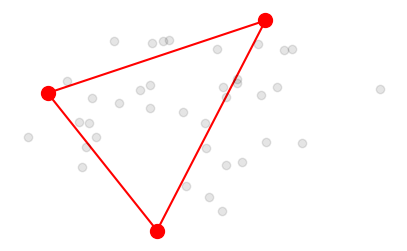

In [12]:
#| fig-cap: "Archetypoids as elements of the data"

fig = plt.figure(figsize=(5, 3))

plt.scatter(data[:, 0], data[:, 1], zorder=10, marker='o', c='k', alpha=0.1)

# plot points that generate the archetypes
index = np.where(aa.archetypes_similarity_degree_ > 0.1)

for i in index[1]:
    plt.scatter(data[i, 0], data[i, 1], c='r', zorder=50, alpha=1)

# plot a dashed line from data to archetypes
for i, j in zip(index[0], index[1]):
    plt.plot([data[j, 0], aa.archetypes_[i, 0]], [data[j, 1], aa.archetypes_[i, 1]], 'r--', zorder=5, alpha=0.2)

plt.scatter(aa.archetypes_[:, 0], aa.archetypes_[:, 1], c='r', s=100, zorder=20)
for simplex in hull.simplices:
    plt.plot(aa.archetypes_[simplex, 0], aa.archetypes_[simplex, 1], 'r-')

# hide axes
plt.axis("off")

plt.show()


---

At the same time, each data point $\bm{X}_n$, i.e. $\bm{x}^{(n)}$, is then approximated as a convex combination of these archetypoids
$$ \bm{X}_n \approx \sum_{k=1}^{K} \bm{{A}}_{n,k} \bm{Z}_k $$
similarly subject to $\|{\bm{{A}}_n}\|_1 = 1$ and $\bm{{A}}_{n,k} \in [0,1]$.

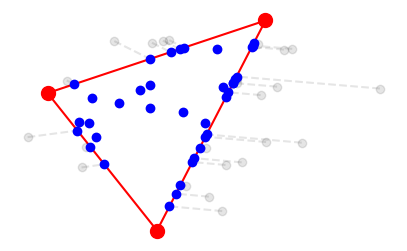

In [13]:
#| fig-cap: Data aproximated as convex combinations of the archetypoids

fig = plt.figure(figsize=(5, 3))

plt.scatter(data[:, 0], data[:, 1], zorder=10, marker='o', c='k', alpha=0.1)

plt.scatter(trans_data[:, 0], trans_data[:, 1], c='b', zorder=10, alpha=1)

# plot a dashed line from data to transformed data
for i in range(data.shape[0]):
    plt.plot([data[i, 0], trans_data[i, 0]], [data[i, 1], trans_data[i, 1]], 'k--', zorder=5, alpha=0.1)

plt.scatter(aa.archetypes_[:, 0], aa.archetypes_[:, 1], c='r', s=100, zorder=20)
for simplex in hull.simplices:
    plt.plot(aa.archetypes_[simplex, 0], aa.archetypes_[simplex, 1], 'r-')

plt.axis("off")
plt.show()

---

This formulation also involves the same matrices of coefficients: $\bm{{B}}$, which defines the archetypoids as some specific data points, and $\bm{{A}}$, which represents each data point as a mixture of archetypoids.

In matrix notation, archetypoid analysis can also be expressed as:
$$ \bm{X} \approx \bm{A} \bm{Z} = \bm{A} (\bm{B} \bm{X})$$

---

### Computation

$$ \argmin_{\bm{A}, \bm{B}} \|{\bm{X} - \bm{A}\bm{B}\bm{X}}\|^2_F $$
where  $\|{\bm{{A}}_n}\|_1 = 1$, $\bm{{A}}_{n,k} \in [0, 1]$, $\|{\bm{B}_k}\|_1 = 1$ and $\bm{{B}}_{k,n} \in \{0, 1\}$.

**Steps**

1. Initialize archetypes
2. Loop until error reduction is sufficiently small:
    1. Aprixmate $\bm{X}$ as convex combinations of $\bm{Z}$, i.e. optimize $\bm{A}$.
    2. Update archetypes, i.e. $\bm{Z} = \bm{A}^{-1} \bm{X}$.
    3. Represent $\bm{Z}$ as elements of $\bm{X}$, i.e. optimize $\bm{B}$.
    4. Update archetypes, i.e. $\bm{Z} = \bm{B}\bm{X}$.
    5. Compute error $\|{\bm{X} - \bm{A}\bm{B}\bm{X}}\|^2_F$.

---

## Functional Archetypal analysis (FAA and FADA)

In this approach, each function $x^{(n)}(t)$ is expressed as a linear combination of a set of known basis functions $\mathfrak{J}(t) = \{j^{(1)}(t), j^{(2)}(t), \dots, j^{(M)}(t)\}$. The expression for each function is given by:
$$
x^{(n)}(t) = \sum_{m=1}^M \bm{C}_{n,m} j^{(m)}(t) = \bm{C}_n^\top \bm{J}(t)
$$
where $\bm{C}_n$ denotes the vector of coefficients of length $M$, and $\bm{J}(t)$ is the functional vector consisting of the basis functions.

---

Along with this, the minimization problem can be expressed (with the corresponding constraints for FAA and FADA) as:
$$\argmin_{\bm{A}, \bm{B}} \sum_{n_1=1}^N \|{\bm{C}_{n_1}^\top\bm{J}(t) - \sum_{k=1}^K \bm{A}_{n_1,k} \sum_{n_2=1}^N \bm{B}_{k,n_2} \bm{C}_{n_2}^\top \bm{J}(t)}\|^2$$

That can be simplified as
$$\argmin_{\bm{A}, \bm{B}} \sum_{n_1=1}^N {\bm{G}_{n_1}}^\top \bm{W} {\bm{G}_{n_1}}$$
where:

- $\bm{G}_{n_1} = \bm{C}_{n_1} - \sum_{k=1}^K \bm{A}_{n,k} \sum_{n_2=1}^N \bm{B}_{k,n_2} \bm{C}_{n_2}$
- $\bm{W}$ is the matrix containing the inner products of the pairs of basis functions.

---

In the case of an orthonormal basis such as Fourier, $\bm{W}$ simplifies to the order $M$ identity matrix, and FAA or FADA are effectively reduced to AA or ADA, respectively, of the basis coefficients.

In other cases, numerical integration may be required to evaluate $\bm{W}$, but once $\bm{W}$ is computed, no further numerical integrations are necessary.

---

#### Example

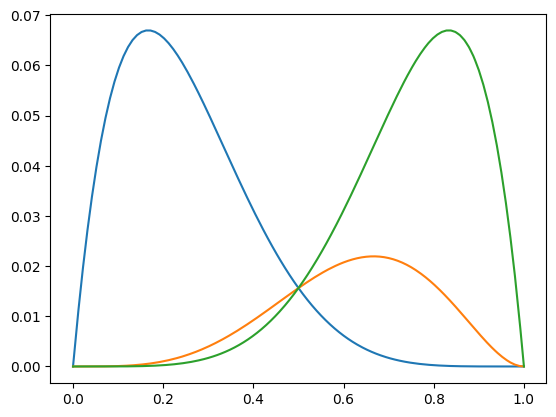

In [436]:
from skfda import datasets, FDataGrid
from skfda.misc.covariances import WhiteNoise
from skfda.representation.basis import FDataBasis, FourierBasis, BSplineBasis, MonomialBasis

n_samples = 20
n_features = 100
n_groups = 3
start = 0
stop = 1

t = np.linspace(start, stop, n_features)

m1 = t ** 1 * (1 - t) ** 5
m2 = t ** 4 * (1 - t) ** 2
m3 = t ** 5 * (1 - t) ** 1

_ = FDataGrid([m1, m2, m3]).plot()

In [437]:
groups = np.full(n_samples * n_groups, None)

for i in range(n_groups):
    groups[i * n_samples:(i+1) * n_samples] = f'Sample {i}'


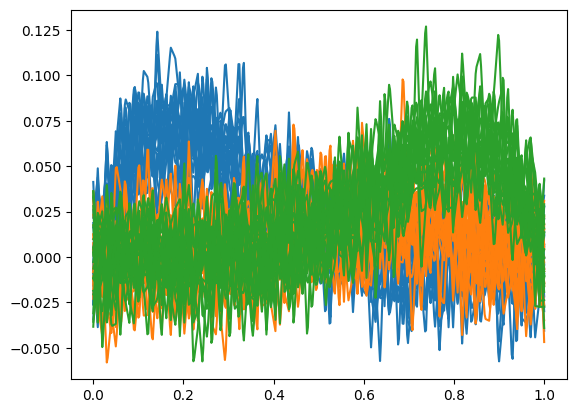

In [457]:
sigma2 = 4e-4
cov = WhiteNoise(variance=sigma2)

fd1 = datasets.make_gaussian_process(n_samples, mean=m1, cov=cov,
                            n_features=n_features, random_state=1, start=start,
                            stop=stop)
fd2 = datasets.make_gaussian_process(n_samples, mean=m2, cov=cov,
                            n_features=n_features, random_state=2, start=start,
                            stop=stop)
fd3 = datasets.make_gaussian_process(n_samples, mean=m3, cov=cov,
                            n_features=n_features, random_state=3, start=start,
                            stop=stop)

fd = FDataGrid(np.concatenate([fd1.data_matrix, fd2.data_matrix, fd3.data_matrix])[:, :, 0])

fd.plot(group = groups)
plt.show()

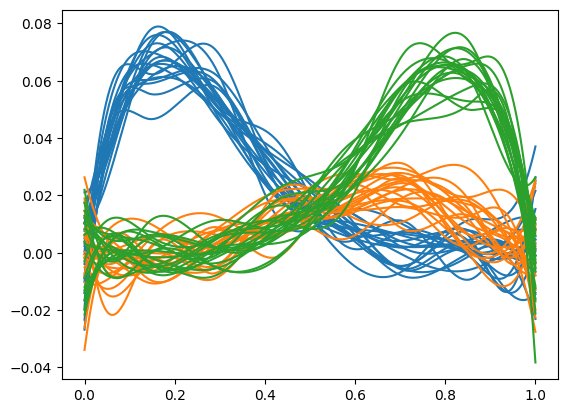

In [472]:
# The desired FDataGrid only contains 10 random samples, so that the example
# provides clearer plots.

n_basis = 10
fourier_basis = FourierBasis(fd.domain_range, n_basis=n_basis)
fourier_fd = FDataBasis.from_data(fd.data_matrix[:, :], grid_points=fd.grid_points, basis=fourier_basis)
bspline_basis = BSplineBasis(fd.domain_range, n_basis=n_basis)
bspline_fd = FDataBasis.from_data(fd.data_matrix[:, :], grid_points=fd.grid_points, basis=bspline_basis)
# monomial_basis = MonomialBasis(domain_range=fd.domain_range, n_basis=n_basis)
# monomial_fd = FDataBasis.from_data(fd.data_matrix[:, :, 0], grid_points=fd.grid_points, basis=monomial_basis)

climates = target[indices_samples].remove_unused_categories()

# fourier_fd.plot(group=groups)
bspline_fd.plot(group=groups)
# monomial_fd.plot(group=climates.codes, group_names=climates.categories)

plt.show()

In [477]:
n_archetypes = 3
fourier_aa = AA(n_archetypes=n_archetypes, method="pgd", init="furthest_sum")
fourier_aa.fit(fourier_fd.coefficients)
fourier_arch = FDataBasis(basis=fourier_basis, coefficients=fourier_aa.archetypes_)

bspline_aa = AA(n_archetypes=n_archetypes, method="pgd", init="furthest_sum")
bspline_aa.fit(bspline_fd.coefficients)
bspline_arch = FDataBasis(basis=bspline_basis, coefficients=bspline_aa.archetypes_)

# monomial_aa = AA(n_archetypes=n_archetypes, method="pgd", init="furthest_sum")
# monomial_aa.fit(monomial_fd.coefficients)
# monomial_arch = FDataBasis(basis=monomial_basis, coefficients=monomial_aa.archetypes_)

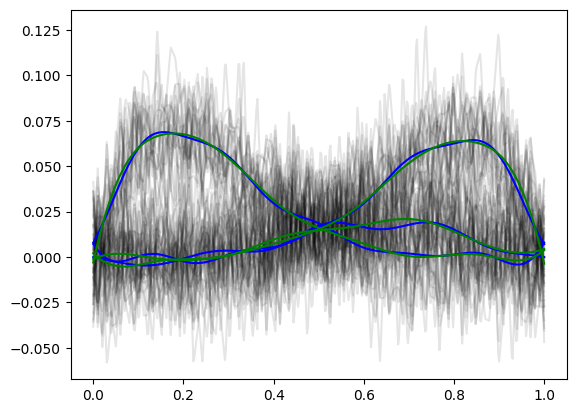

In [478]:
fig, ax = plt.subplots()
fd.plot(color="black", axes=ax, alpha=0.1)
fourier_arch.plot(axes=ax, color="blue")
bspline_arch.plot(axes=ax, color="green")
# monomial_arch.plot(axes=ax, color="red")

plt.show()

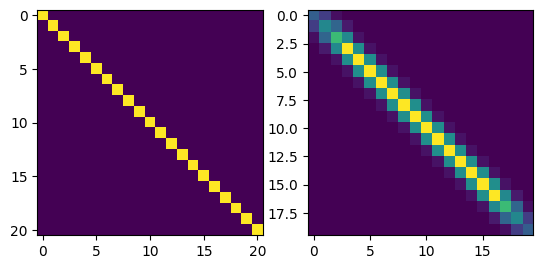

In [343]:

fig, ax = plt.subplots(1, 2)
ax[0].imshow(fourier_basis.inner_product_matrix(), )
ax[1].imshow(bspline_basis.inner_product_matrix(), )

plt.show()
